### pobieracie dane ze strony https://www.kaggle.com/datasets/saurabh00007/diabetescsv

In [22]:
# importowanie dnaych 
import pandas as pd
df3 = pd.read_csv("C:/Users/mrgrz/OneDrive/Pulpit/diabetes.csv")#tutaj musicie podać ścieżke do folderu
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# konstrukcja tablicy pandasowej (chcemy stwoarzyć grupy wzajemnie zależne od wieku, tkanki tłusczu,
# i BMI)
PKP = df3[['Age','SkinThickness','BMI']]

In [3]:
PKP.head() 

,Age,SkinThickness,BMI
0,50,35,33.6
1,31,29,26.6
2,32,0,23.3
3,21,23,28.1
4,33,35,43.1


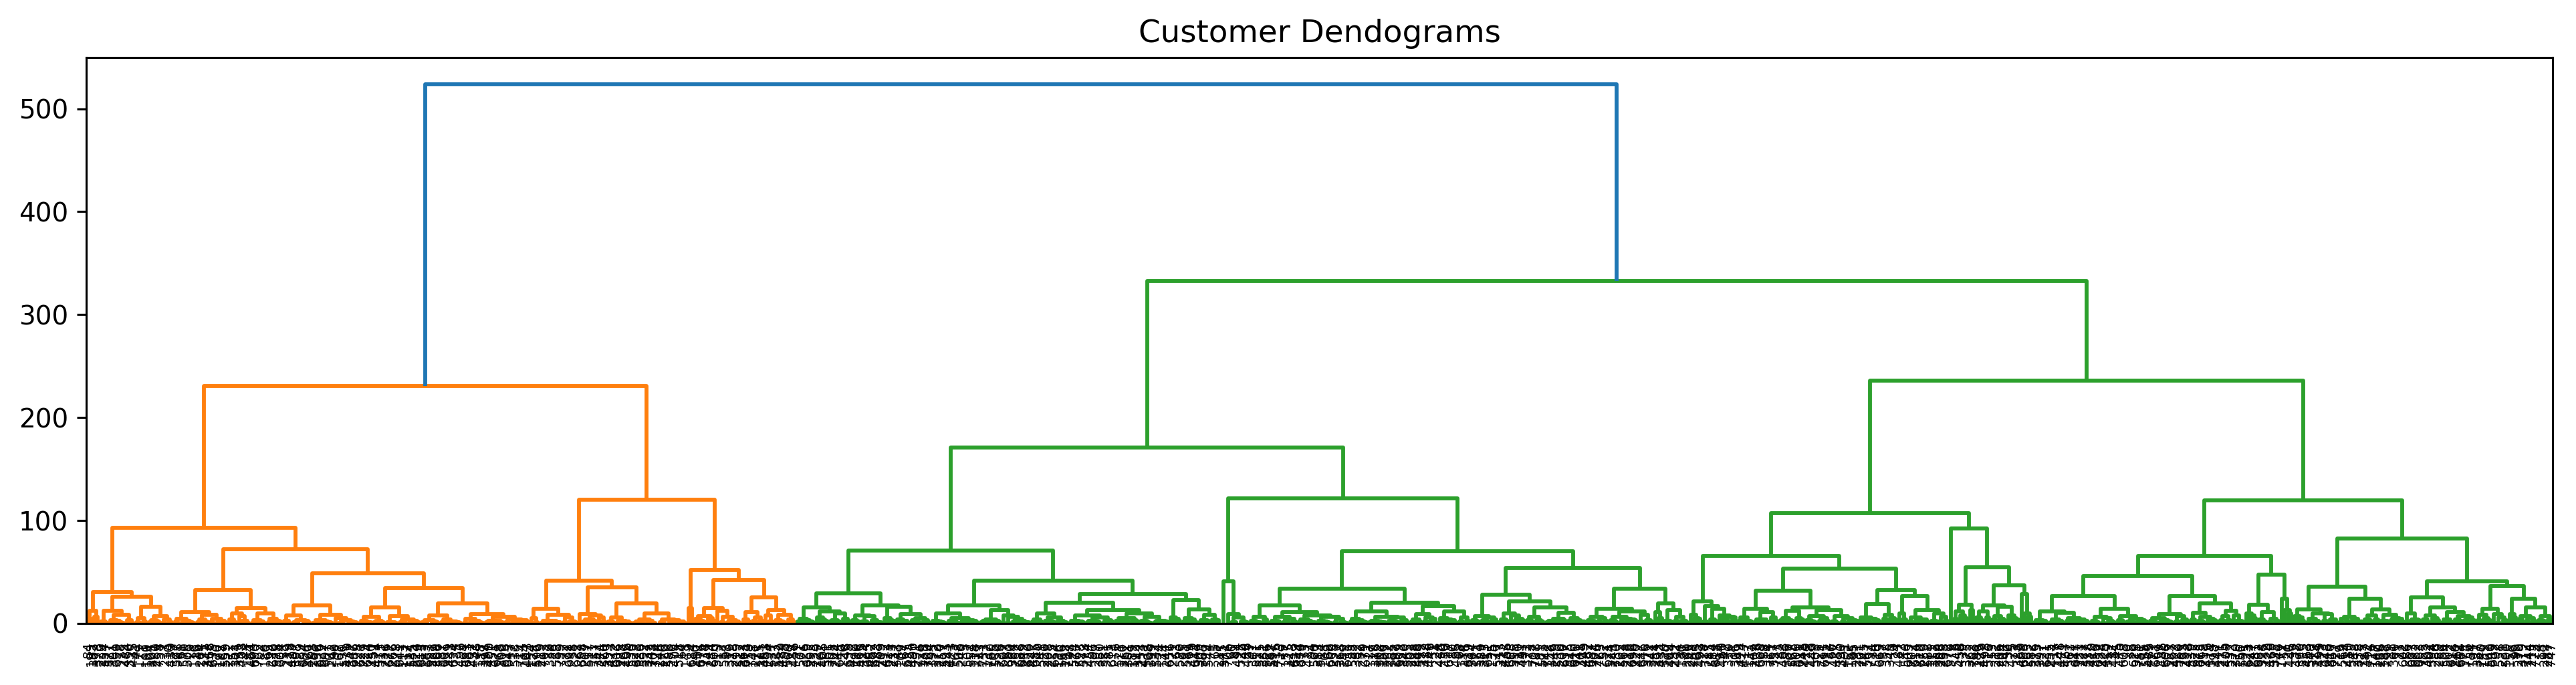

In [31]:
# import algorymu który obrazuje denedrorgam 
# z dendrogramu odczytuje się ilość klastrów które trzba podać do uczenia 


import scipy.cluster.hierarchy as shc # algorytm do dendrogramu 
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 4), dpi= 280)  
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(PKP, method='ward'))


In [ ]:
# tym przypdakuu ilość klastrów któr mamy podać do uczenia to 5 

In [27]:
# UCZENIE ALOGRYMU 
#  na podastawie ilość klastrów z dentrogramu 


from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
KF = cluster.fit_predict(PKP)


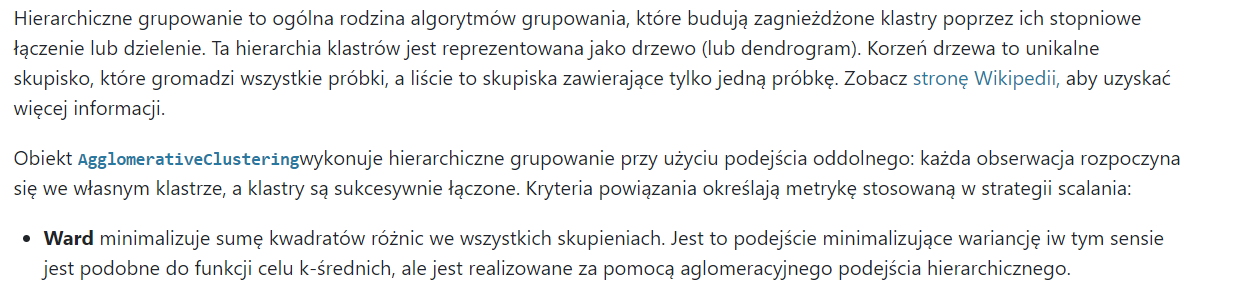

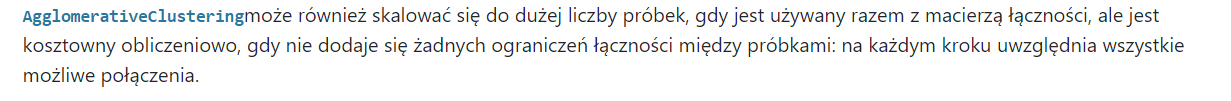

In [24]:
# Tutaj macie algorytm i metody które zwracają zmienne potrzebne do wizualiacji 


from sklearn.cluster import KMeans

# Inicjowanie Zmiennej KMeams 
kmeans = KMeans(n_clusters=5)
# Dopasowanie do wejscia 
kmeans = kmeans.fit(PKP)



# przewidywanie ilości klastrów
labels = kmeans.predict(PKP)
# centrodidy w skupionych danych (te czerwoene punkty)
C = kmeans.cluster_centers_


In [25]:
print(kmeans)
print('labels:',labels)
print('centroidy:',C)

KMeans(n_clusters=5)
labels: [4 0 3 0 2 3 0 3 4 1 3 3 1 4 4 3 2 3 2 2 2 1 1 2 4 4 1 0 4 3 4 2 0 3 4 0 3
 4 2 4 0 3 4 4 3 2 3 0 2 3 0 0 0 4 4 0 4 2 1 2 3 3 3 0 1 0 4 1 0 0 0 2 1 0
 0 0 1 2 3 0 0 3 0 0 3 0 2 0 4 0 3 0 2 1 0 4 0 0 0 2 3 3 3 0 3 0 3 4 2 0 2
 4 2 3 4 1 3 3 0 0 2 2 0 1 3 2 2 2 4 1 0 3 2 4 0 0 0 0 3 2 1 4 0 1 0 0 4 2
 1 0 2 3 4 2 1 2 0 0 0 4 2 4 2 0 3 4 0 3 3 0 3 0 0 2 0 2 1 2 1 3 3 0 0 3 3
 4 4 2 2 2 3 2 3 1 4 2 3 0 2 0 0 3 0 0 4 0 4 1 0 4 0 2 4 2 4 2 2 0 0 1 0 1
 3 4 0 0 3 2 2 2 3 4 0 3 0 3 4 2 0 3 0 2 3 0 2 1 1 2 2 0 1 3 0 2 1 2 2 0 0
 4 0 3 2 1 3 4 3 2 3 3 2 0 3 2 1 2 0 0 1 3 3 4 0 1 1 4 2 2 0 2 0 2 2 2 1 2
 2 0 4 1 3 2 2 3 3 2 4 0 0 0 4 2 0 3 4 0 3 3 2 1 0 0 0 4 2 0 2 3 2 4 4 0 1
 1 0 2 1 1 2 1 0 0 2 3 1 4 0 3 0 2 3 3 4 0 3 1 2 4 4 2 2 1 4 1 0 0 3 0 0 4
 2 0 0 2 2 4 0 2 3 2 0 0 3 0 0 0 4 4 4 0 4 3 0 3 3 0 4 2 3 2 3 1 2 4 1 2 1
 3 3 2 2 0 0 0 2 2 0 2 3 0 2 0 2 0 2 2 3 4 2 4 3 0 0 3 3 3 4 3 0 3 4 0 0 3
 0 2 0 2 2 0 0 3 2 1 0 4 1 0 4 4 4 3 2 4 3 0 3 2 3 2 2 2 0 1 3 4 2 0 4 

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'BMI')

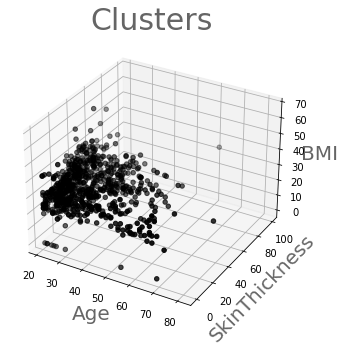

In [6]:
# wizualaizcja danych 
# ogólne skupienie dnaych 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PKP['Age'], PKP['SkinThickness'], PKP['BMI'], color='black',marker='o')

ax.set_title('Clusters', fontsize= 30, alpha=0.6)
ax.set_xlabel('Age', fontsize= 20, alpha=0.6)
ax.set_ylabel('SkinThickness', fontsize= 20, alpha=0.6)
ax.set_zlabel('BMI', fontsize= 20, alpha=0.6)

Text(0.5, 0, 'BMI')

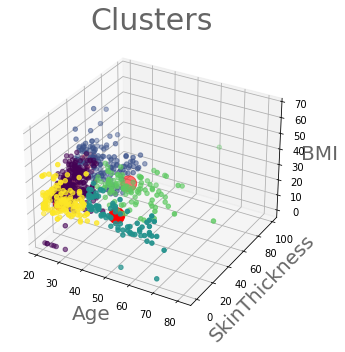

In [10]:
# wizuzalizacja skupień zbiorów (w taki sposówb algorym podzielił zbiory)
# różne kolory obrazują w jaki sposób zostały podzielone dane a czerwoen kropki to centridy 
# w zółtym fiottowym i niebieskim też są centriody ale ich nie widać :P

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PKP['Age'], PKP['SkinThickness'], PKP['BMI'], c=KF)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='.', c='red', s=1000)

ax.set_title('Clusters', fontsize= 30, alpha=0.6)
ax.set_xlabel('Age', fontsize= 20, alpha=0.6)
ax.set_ylabel('SkinThickness', fontsize= 20, alpha=0.6)
ax.set_zlabel('BMI', fontsize= 20, alpha=0.6)